## Image Preparation

Before training a classifier or predicting images with a trained model, the images will need to be
a standard shape and format. We chose to either crop or pad the images from the ImageStream
to 64x64x(number of channels) pixels. Rather than having thousands of tiny images to manage and open,
all of the images were stored in a large numpy array (.npy). This file can be directly read into python
as a numpy array.

This notebook goes through the steps to convert tiff files exported from IDEAS into a numpy file.

The source code for the Image3C classifier is [here](https://github.com/stowersinstitute/LIBPB-1390-Image3C/tree/master/Code/Classifier).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tifffile
import pickle

from image3c import imageprep, utils as u3c

## Save images in each folder as a numpy array files

Use `imageprep.run('tif file location', 'folder to save numpy files')`

This will convert tiff files exported from IDEAS and save them in a file
that can be directly loaded into python as a numpy array. Each image will be
cropped or padded to `64x64x(number of channels).`

The `tif file location` can be a folder that contains subfolders with tiff files.
An individual numpy file will be created for each subfolder.

In the example below, `tif file location` is set to `Data/Male/Tifs/.` This folder
contains a folder for each of the 5 replicates. Five numpy files are created, and they
are saved in `Data/Male/npfiles`.

This can take a while if there are many images.


In [ ]:
imageprep.run('Data/Male/Tifs/', 'Data/Male/npfiles/')

In [ ]:
!ls -lh Data/Male/npfiles

### Extract cluster IDs from csv file to create labels

After
[Clustering with Vortex](https://github.com/stowersinstitute/LIBPB-1390-Image3C/blob/master/Readme.md#clustering-the-events-in-vortex-clustering-environmentxshift), the events that will be used to train the classifier, the cluster IDs and feature information for each image are stored in a csv file. The cluster IDs for the snail data are in Data/ClusterIDs.csv.

This file will be used to create labels for training the classifier. 

The corresponding numpy image file is Data/snail_images.npy and the label file is Data/snail_labels.npy.

In [7]:
labels = u3c.cluster_to_classes('Data/ClusterIDs.csv')

print(f"There are {len(labels)} labels in the file")

for i, b in enumerate(labels.sum(axis=0)):
    print(f"Number in cluster {i}: {b:9}")

There are 35469 labels in the file
Number in cluster 0:     10930
Number in cluster 1:      1729
Number in cluster 2:      2015
Number in cluster 3:      4899
Number in cluster 4:       276
Number in cluster 5:      3152
Number in cluster 6:      3081
Number in cluster 7:       867
Number in cluster 8:      8520


In [16]:
'''labels are a one-hot encoded array, where each row is a cell
and the previously assigned cluster is the element with value 1

here are some examples:
'''

labels[[18,11200,6789, 12000, 30000]]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [25]:
## save labels as npy file
np.save('Data/labels.npy', labels)

## Load a saved npy image file to verify
One of the numpy files can be loaded and images can be displayed to verify the process worked.

In [8]:
x = np.load('Data/Male/npfiles/Tifs_Snail_Male_R2.npy')
x.shape

(7225, 64, 64, 3)

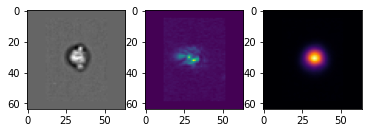

In [11]:
## change image_num to see a different image
image_num = 152
fig, ax = plt.subplots(1,3, figsize=(6,2))
ax[0].imshow(x[image_num,:,:,0], cmap='gray')
ax[1].imshow(x[image_num,:,:,1])
ax[2].imshow(x[image_num,:,:,2], cmap='inferno')